In [1]:
import numpy as np

In [2]:
import xarray as xr

In [3]:
%matplotlib inline

In [4]:
from matplotlib.pyplot import *

In [5]:
from datetime import datetime

In [6]:
data = np.random.rand(3, 10)

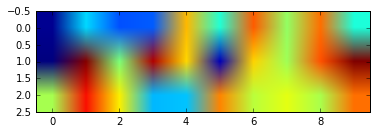

In [8]:
imshow(data)

In [9]:
data.shape

(3, 10)

In [40]:
a = xr.DataArray(data, dims=['y', 'x'], coords={'y': ['A', 'B', 'C'], 'date': datetime(2013, 3, 16)})
a

<xarray.DataArray (y: 3, x: 10)>
array([[ 0.0429289 ,  0.33938654,  0.21674902,  0.22753095,  0.68395407,
         0.39094687,  0.77467623,  0.51696466,  0.75943175,  0.38275408],
       [ 0.02639399,  0.94732725,  0.49094081,  0.90909402,  0.65737675,
         0.07184436,  0.66002162,  0.53055385,  0.78551893,  0.95129523],
       [ 0.53927173,  0.85074663,  0.63138561,  0.31078671,  0.31914326,
         0.73700543,  0.55976134,  0.60737377,  0.54293409,  0.75794238]])
Coordinates:
    date     datetime64[ns] 2013-03-16
  * y        (y) <U1 'A' 'B' 'C'
  * x        (x) int64 0 1 2 3 4 5 6 7 8 9

In [41]:
a['another_index'] = 42

In [42]:
a

<xarray.DataArray (y: 3, x: 10)>
array([[ 0.0429289 ,  0.33938654,  0.21674902,  0.22753095,  0.68395407,
         0.39094687,  0.77467623,  0.51696466,  0.75943175,  0.38275408],
       [ 0.02639399,  0.94732725,  0.49094081,  0.90909402,  0.65737675,
         0.07184436,  0.66002162,  0.53055385,  0.78551893,  0.95129523],
       [ 0.53927173,  0.85074663,  0.63138561,  0.31078671,  0.31914326,
         0.73700543,  0.55976134,  0.60737377,  0.54293409,  0.75794238]])
Coordinates:
    date           datetime64[ns] 2013-03-16
  * y              (y) <U1 'A' 'B' 'C'
  * x              (x) int64 0 1 2 3 4 5 6 7 8 9
    another_index  int64 42

In [39]:
a.isel(y=1)

<xarray.DataArray (x: 10)>
array([ 0.02639399,  0.94732725,  0.49094081,  0.90909402,  0.65737675,
        0.07184436,  0.66002162,  0.53055385,  0.78551893,  0.95129523])
Coordinates:
    date     datetime64[ns] 2013-03-16
    y        <U1 'B'
  * x        (x) int64 0 1 2 3 4 5 6 7 8 9

In [23]:
a = xr.DataArray(data, dims=['x', 'y'], coords={'time':datetime(2010, 1, 3)})
a

<xarray.DataArray (x: 3, y: 10)>
array([[ 0.0429289 ,  0.33938654,  0.21674902,  0.22753095,  0.68395407,
         0.39094687,  0.77467623,  0.51696466,  0.75943175,  0.38275408],
       [ 0.02639399,  0.94732725,  0.49094081,  0.90909402,  0.65737675,
         0.07184436,  0.66002162,  0.53055385,  0.78551893,  0.95129523],
       [ 0.53927173,  0.85074663,  0.63138561,  0.31078671,  0.31914326,
         0.73700543,  0.55976134,  0.60737377,  0.54293409,  0.75794238]])
Coordinates:
    time     datetime64[ns] 2010-01-03
  * x        (x) int64 0 1 2
  * y        (y) int64 0 1 2 3 4 5 6 7 8 9

In [24]:
b = xr.DataArray(data, dims=['x', 'y'], coords={'time':datetime(2010, 1, 4)})
c = xr.DataArray(data, dims=['x', 'y'], coords={'time':datetime(2010, 1, 5)})
d = xr.DataArray(data, dims=['x', 'y'], coords={'time':datetime(2010, 1, 6)})


In [25]:
comb = xr.concat([a, b, c, d], 'time')

In [26]:
comb

<xarray.DataArray (time: 4, x: 3, y: 10)>
array([[[ 0.0429289 ,  0.33938654,  0.21674902,  0.22753095,  0.68395407,
          0.39094687,  0.77467623,  0.51696466,  0.75943175,  0.38275408],
        [ 0.02639399,  0.94732725,  0.49094081,  0.90909402,  0.65737675,
          0.07184436,  0.66002162,  0.53055385,  0.78551893,  0.95129523],
        [ 0.53927173,  0.85074663,  0.63138561,  0.31078671,  0.31914326,
          0.73700543,  0.55976134,  0.60737377,  0.54293409,  0.75794238]],

       [[ 0.0429289 ,  0.33938654,  0.21674902,  0.22753095,  0.68395407,
          0.39094687,  0.77467623,  0.51696466,  0.75943175,  0.38275408],
        [ 0.02639399,  0.94732725,  0.49094081,  0.90909402,  0.65737675,
          0.07184436,  0.66002162,  0.53055385,  0.78551893,  0.95129523],
        [ 0.53927173,  0.85074663,  0.63138561,  0.31078671,  0.31914326,
          0.73700543,  0.55976134,  0.60737377,  0.54293409,  0.75794238]],

       [[ 0.0429289 ,  0.33938654,  0.21674902,  0.22753095,

In [28]:
comb.mean(dim='time')

<xarray.DataArray (x: 3, y: 10)>
array([[ 0.0429289 ,  0.33938654,  0.21674902,  0.22753095,  0.68395407,
         0.39094687,  0.77467623,  0.51696466,  0.75943175,  0.38275408],
       [ 0.02639399,  0.94732725,  0.49094081,  0.90909402,  0.65737675,
         0.07184436,  0.66002162,  0.53055385,  0.78551893,  0.95129523],
       [ 0.53927173,  0.85074663,  0.63138561,  0.31078671,  0.31914326,
         0.73700543,  0.55976134,  0.60737377,  0.54293409,  0.75794238]])
Coordinates:
  * x        (x) int64 0 1 2
  * y        (y) int64 0 1 2 3 4 5 6 7 8 9

In [35]:
comb.groupby('time.month').mean(dim='time')

<xarray.DataArray (month: 1, x: 3, y: 10)>
array([[[ 0.0429289 ,  0.33938654,  0.21674902,  0.22753095,  0.68395407,
          0.39094687,  0.77467623,  0.51696466,  0.75943175,  0.38275408],
        [ 0.02639399,  0.94732725,  0.49094081,  0.90909402,  0.65737675,
          0.07184436,  0.66002162,  0.53055385,  0.78551893,  0.95129523],
        [ 0.53927173,  0.85074663,  0.63138561,  0.31078671,  0.31914326,
          0.73700543,  0.55976134,  0.60737377,  0.54293409,  0.75794238]]])
Coordinates:
  * x        (x) int64 0 1 2
  * y        (y) int64 0 1 2 3 4 5 6 7 8 9
  * month    (month) int64 1

In [33]:
g.groups

{1: [0, 1, 2, 3]}

In [ ]:
ds = comb.to_dataset(name='test')

In [ ]:
ds.to_netcdf('test.nc')

In [ ]:
!mkdir multifile

In [ ]:
!cp test.nc multifile/test2.nc

In [ ]:
ds = xr.open_mfdataset('multifile/*.nc', concat_dim='time')

In [ ]:
ds['time'].values

In [ ]:
ds.sel(time='2010-01-03')

In [ ]:
da = ds['test']

In [ ]:
da.sel(time='2010-01-03').mean(dim='time').plot()